# $t\bar{t}$ limits 

**Goal:** Evaluate the limits with my new background proposal!!

In [2]:
import pandas as pd
import numpy as np
from tqdm import tqdm
import json
from itertools import product
from glob import glob
import uproot
import matplotlib.pyplot as plt
from matplotlib import gridspec

from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.ticker import AutoLocator, AutoMinorLocator, MultipleLocator,FixedLocator, LogLocator

from crypto_utils import *

import os
from glob import glob

os.sys.path += ['../non-resonant-studies', "../PyATLASstyle/", "../stats-results/"]

from quad45_2x2 import res_bin_edges

# Let's do ATLAS style plots too!
import matplotlib as mpl
import PyATLASstyle as pas
pas.applyATLASstyle(mpl)

%load_ext autoreload
%autoreload 2

Using uproot4


../PyATLASstyle/PyATLASstyle.py:12: MatplotlibDeprecationWarning: 
The createFontList function was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use FontManager.addfont instead.
  font_list = font_manager.createFontList(font_files)


In [3]:
idx = [16,17,18,'16-17-18']
cols = ['no-norm','norm','ttbar']

In [4]:
lim_4b   = pd.DataFrame(0,index=idx,columns=cols)
lim_3b1f = pd.DataFrame(0,index=idx,columns=cols)

obs_3b1f = pd.DataFrame(0,index=idx,columns=cols)

In [5]:
fDir = '../stats-results/ttbarStudies'

In [8]:
f'{fDir}/lim-4b-systs-HTcut-300.0-16-SM-HH-ttbarComp.csv'

'../stats-results/ttbarStudies/lim-4b-systs-HTcut-300.0-16-SM-HH-ttbarComp.csv'

In [6]:
for yr in idx:
    for col, l in zip(cols,['incl','norm','ttbarComp']):

        # 4b
        fname = f'{fDir}/lim-4b-systs-HTcut-300.0-{yr}-SM-HH-{l}.csv'
        lims = pd.read_csv(fname)
        
        lim_4b.loc[yr,col] = lims.loc[0,'Exp']
        
        
        # 3b1f
        try:
            fname = f'{fDir}/lim-3b1f-systs-HTcut-300.0-bkg-0.1-{yr}-SM-HH-unblind-{l}.csv'
            lims = pd.read_csv(fname)
            print(lims.values)
            lim_3b1f.loc[yr,col] = lims.loc[0,'Exp']
            obs_3b1f.loc[yr,col] = lims.loc[0,'Obs']
        except FileNotFoundError:
            print(fname)

[[66.979 24.018 32.252 44.784 62.35  83.647]]
[[ 72.834  36.47   48.885  67.704  93.934 125.531]]
[[66.976 24.021 32.256 44.791 62.358 83.658]]
../stats-results/ttbarStudies/lim-3b1f-systs-HTcut-300.0-bkg-0.1-17-SM-HH-unblind-incl.csv
[[ 70.236  32.95   44.137  61.066  84.606 112.878]]
../stats-results/ttbarStudies/lim-3b1f-systs-HTcut-300.0-bkg-0.1-17-SM-HH-unblind-ttbarComp.csv
[[46.268 11.138 14.97  20.816 29.035 39.039]]
[[42.577 12.875 17.289 24.015 33.459 44.935]]
[[46.27  11.142 14.976 20.824 29.046 39.054]]
[[42.249  9.188 12.343 17.15  23.896 32.088]]
[[37.689 11.401 15.306 21.25  29.582 39.691]]
[[42.248  9.191 12.347 17.155 23.903 32.097]]


In [7]:
lim_4b

no-norm    norm   ttbar
16         16.333  16.001  16.554
17         13.587  24.528  13.618
18         11.195  21.344  11.380
16-17-18    7.610  11.369  22.014

In [29]:
lim_3b1f.round(2)

no-norm   norm  ttbar
16    44.78  67.70  44.79
17     0.00  61.07   0.00
18    20.82  24.02  20.82

In [28]:
obs_3b1f.round(2)

no-norm   norm  ttbar
16    66.98  72.83  66.98
17     0.00  70.24   0.00
18    46.27  42.58  46.27

In [33]:
11.37 / 7.6

1.4960526315789473

## Pulls

In [34]:
fDir

'../stats-results/ttbarStudies'

In [53]:
base = 'ws-4b-systs-HTcut-300.0-16-17-18-SM-HH'

p_incl  = pd.read_csv(f'{fDir}/{base}-incl_b_only_pulls.csv')
p_norm  = pd.read_csv(f'{fDir}/{base}-norm_b_only_pulls.csv')
p_ttbar = pd.read_csv(f'{fDir}/{base}-ttbarComp_b_only_pulls.csv')


Using uproot4


In [54]:
# S+B - there will be some pull, but this really isn't as interesting!!
sb_incl  = pd.read_csv(f'{fDir}/{base}-incl_pulls.csv')
sb_norm  = pd.read_csv(f'{fDir}/{base}-norm_pulls.csv')
sb_ttbar = pd.read_csv(f'{fDir}/{base}-ttbarComp_pulls.csv')

In [43]:
sb_incl[:7]

label    pull     err
0             high_HT16_4b  0.0005  0.4769
1             high_HT17_4b -0.0010  0.3171
2             high_HT18_4b -0.0008  0.4318
3              low_HT16_4b -0.0003  0.6009
4              low_HT17_4b  0.0016  0.4122
5              low_HT18_4b  0.0001  0.3383
6  uncorr_bkguncrt164b[00]  0.0000  0.8992

In [39]:
p_incl[:6]

label  pull     err
0  high_HT16_4b  -0.0  0.4585
1  high_HT17_4b   0.0  0.3015
2  high_HT18_4b   0.0  0.4282
3   low_HT16_4b   0.0  0.5987
4   low_HT17_4b   0.0  0.4115
5   low_HT18_4b   0.0  0.3383

In [41]:
p_norm[:9]

label  pull     err
0  bkg_norm16_4b   0.0  0.9400
1  bkg_norm17_4b   0.0  0.6077
2  bkg_norm18_4b   0.0  0.6020
3   high_HT16_4b   0.0  0.4656
4   high_HT17_4b  -0.0  0.3231
5   high_HT18_4b  -0.0  0.3968
6    low_HT16_4b  -0.0  0.5716
7    low_HT17_4b  -0.0  0.3074
8    low_HT18_4b  -0.0  0.2683

In [56]:
p_ttbar[:15]

label    pull     err
0    ah_norm16_4b  0.9552  0.8028
1    ah_norm17_4b  0.4346  0.9506
2    ah_norm18_4b  0.9381  0.7476
3   bkg_norm16_4b -1.3136  0.7762
4   bkg_norm17_4b -0.7466  0.4303
5   bkg_norm18_4b -1.3523  0.4774
6    high_HT16_4b  0.5818  0.2932
7    high_HT17_4b  0.2839  0.3269
8    high_HT18_4b  0.0973  0.2883
9     low_HT16_4b  0.8443  0.7909
10    low_HT17_4b  0.1507  0.8689
11    low_HT18_4b  0.2676  0.9726
12   sl_norm16_4b -0.0766  0.9943
13   sl_norm17_4b  0.0000  0.9933
14   sl_norm18_4b -0.1844  0.9987

**Q:** How can an asimov only fit have *such* large pulls?

In [57]:
sb_ttbar[:15]

label    pull     err
0    ah_norm16_4b  0.9511  0.8008
1    ah_norm17_4b  0.4186  0.9552
2    ah_norm18_4b  0.9522  0.7544
3   bkg_norm16_4b -1.3196  0.7761
4   bkg_norm17_4b -0.7363  0.4324
5   bkg_norm18_4b -1.3469  0.4776
6    high_HT16_4b  0.5194  0.3958
7    high_HT17_4b  0.2349  0.3884
8    high_HT18_4b  0.0355  0.3907
9     low_HT16_4b  0.8531  0.7917
10    low_HT17_4b  0.1806  0.8779
11    low_HT18_4b  0.2826  0.9746
12   sl_norm16_4b -0.0765  0.9943
13   sl_norm17_4b -0.0000  0.9933
14   sl_norm18_4b -0.1875  0.9988

In [59]:
os.sys.path += ['../deta_cats/']
from statUtils import plotCorrelation

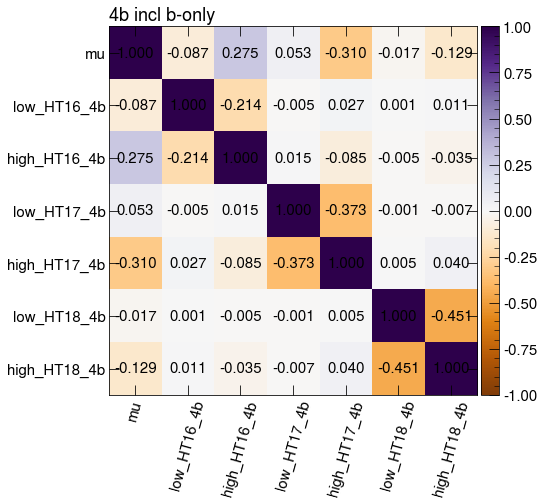

In [64]:
plotCorrelation(f'{fDir}/{base}-incl_b_only_correlations.csv',
                title='4b incl b-only',cmap="PuOr",bcat='4b',figDir='',tag='') #,resort=True)

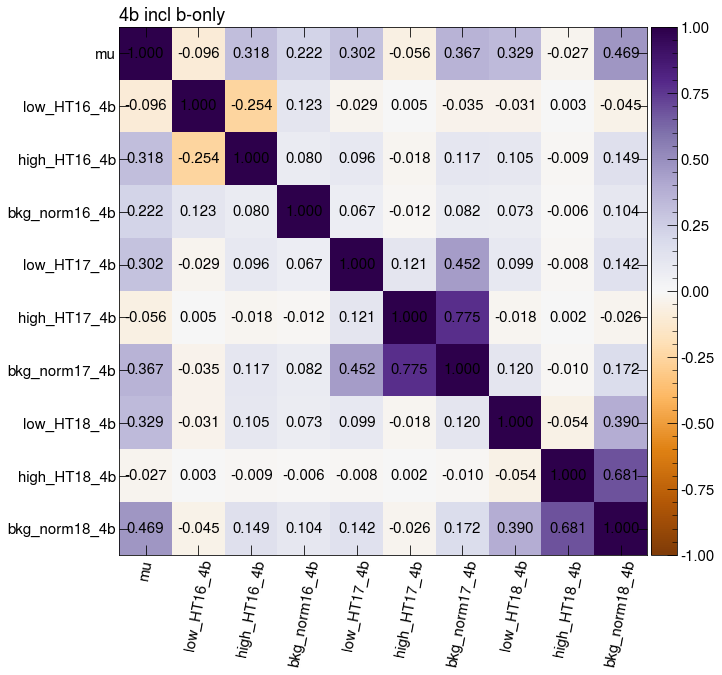

In [65]:
plotCorrelation(f'{fDir}/{base}-norm_b_only_correlations.csv',
                title='4b incl b-only',cmap="PuOr",bcat='4b',figDir='',tag='') #,resort=True)

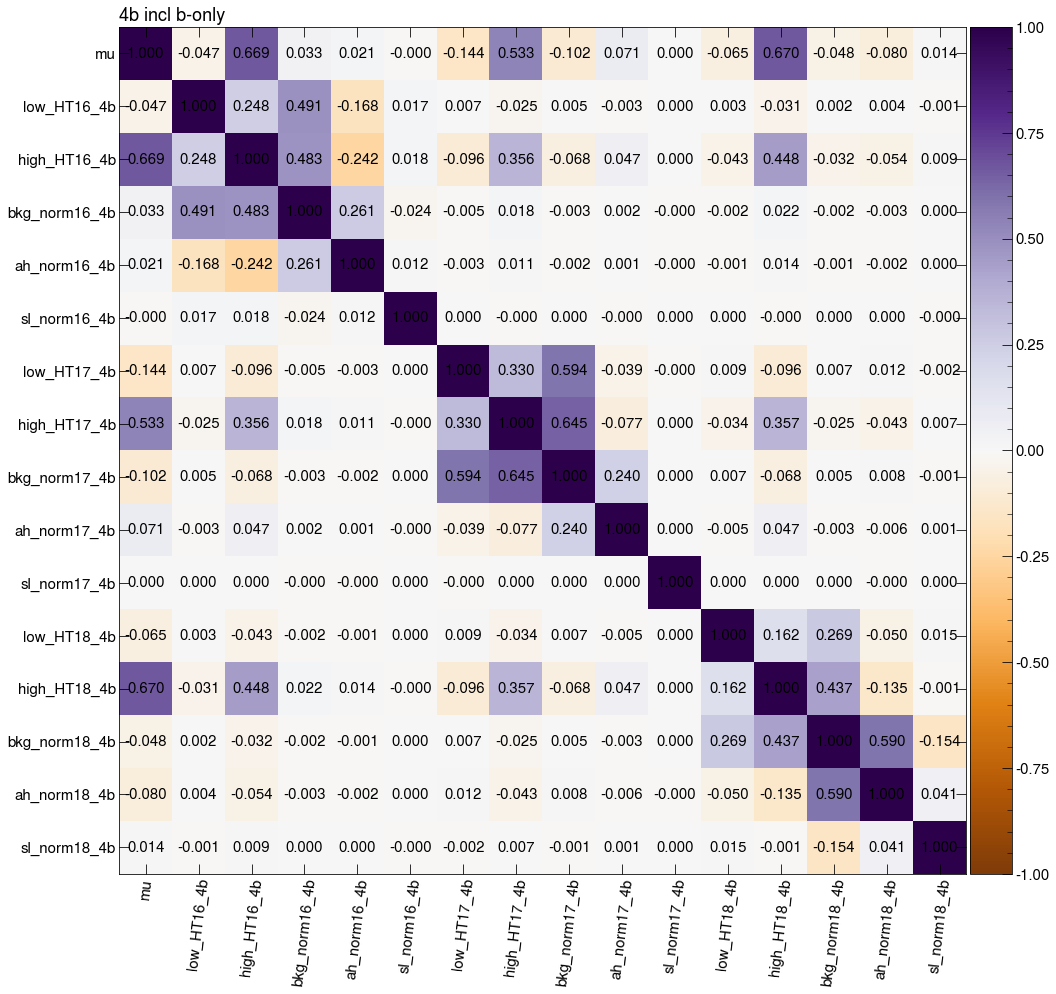

In [68]:
plotCorrelation(f'{fDir}/{base}-ttbarComp_b_only_correlations.csv',
                title='4b incl b-only',cmap="PuOr",bcat='4b',figDir='',tag='')#,resort=True)